In [12]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score

## 베르누이 분포와 이항분포

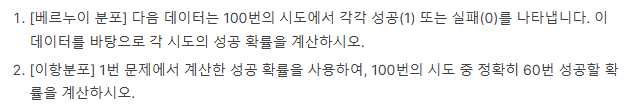

In [2]:
# 데이터 불러오기
df = pd.read_csv('C:/Users/User/Desktop/빅분기 연습/t3_success.csv')
df.head()

,Success
0,1
1,0
2,0
3,1
4,1


In [3]:
# 1. 베르누이 분포: 각 시도의 성공 확률 계산
total_attempts = len(df)
number_of_successes = df['Success'].sum()
success_probability = number_of_successes / total_attempts
print(success_probability)

0.62


In [4]:
# 2. 이항분포: 100번의 시도 중 정확히 60번 성공할 확률 계산
n = 100
k = 60
probaility_of_60_successes = stats.binom.pmf(k, n, success_probability)
print(probaility_of_60_successes)

0.07464985555860272


## 점추정과 구간추정

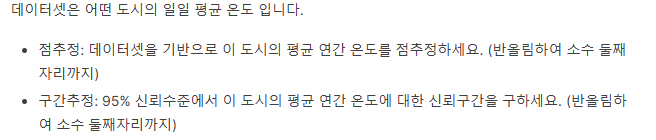

In [5]:
# 데이터 불러오기
df = pd.read_csv('C:/Users/User/Desktop/빅분기 연습/daily_temperatures.csv')
df.head()

,Daily Average Temperature
0,28.820262
1,22.000786
2,24.893690
3,31.204466
4,29.337790


In [6]:
# 점추정: 샘플 평균 계산
sample_mean = df['Daily Average Temperature'].mean()

# 구간추정: 샘플 표준편차 계산 및 신뢰구간 계산
confidence_level = 0.95
sample_std = df['Daily Average Temperature'].std()
n_samples = len(df)

# 95% 신뢰구간 계산
confidence_interval = stats.t.interval(confidence_level, df = n_samples - 1, loc = sample_mean, 
                                       scale = sample_std / (n_samples ** 0.5))

sample_mean, confidence_interval

(19.937577543978538, (19.427887094620406, 20.44726799333667))

## 이원 분산 분석

* 크리스마스 장식 종류와 지역에 따라 판매량에 유의미한 차이가 있는지 이원 분산 분석을 통해 검정하세요

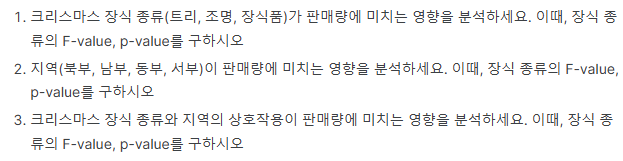

In [8]:
# 데이터 불러오기
df = pd.read_csv('C:/Users/User/Desktop/빅분기 연습/christmas_decoration_sales.csv')
df.head()

,Decoration_Type,Region,Sales
0,트리,북부,64
1,트리,남부,67
2,트리,동부,84
3,트리,서부,87
4,트리,북부,87


In [10]:
# 이원 분산 분석
model = ols('Sales ~ C(Decoration_Type) * C(Region)', data = df).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Decoration_Type),2.0,1764.500000,882.250000,2.370578,0.114943
C(Region),3.0,804.305556,268.101852,0.720381,0.549614
C(Decoration_Type):C(Region),6.0,5153.944444,858.990741,2.308081,0.066915
Residual,24.0,8932.000000,372.166667,NaN,NaN


# 이기적 빅데이터분석기사 실기

## 기출문제 4회(2022.06.25 시행)

* Customer_Segmentation 데이터셋은 고객 세분화 정보를 담고 있다.
* 주어진 훈련데이터셋을 활용하여 고객이 속한 세그먼트를 예측하고 해당 예측결과를 다음과 같은 형식의 CSV파일로 저장하시오.

In [14]:
X_test = pd.read_csv('C:/Users/User/Desktop/빅분기 연습/dataset-main/CS_Seg_X_test.csv')
X_train = pd.read_csv('C:/Users/User/Desktop/빅분기 연습/dataset-main/CS_Seg_X_train.csv')
y_train = pd.read_csv('C:/Users/User/Desktop/빅분기 연습/dataset-main/CS_Seg_y_train.csv')

In [15]:
# 결측값 확인
print(f' X_train: {X_train.isnull().sum().sum()}')
print(f' y_train: {y_train.isnull().sum().sum()}')
print(f' X_test: {X_test.isnull().sum().sum()}')

 X_train: 0
 y_train: 0
 X_test: 0


In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6718 non-null   int64  
 1   Gender           6718 non-null   object 
 2   Ever_Married     6718 non-null   object 
 3   Age              6718 non-null   int64  
 4   Graduated        6718 non-null   object 
 5   Profession       6718 non-null   object 
 6   Work_Experience  6718 non-null   float64
 7   Spending_Score   6718 non-null   object 
 8   Family_Size      6718 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 472.5+ KB


In [17]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2178 non-null   int64  
 1   Gender           2178 non-null   object 
 2   Ever_Married     2178 non-null   object 
 3   Age              2178 non-null   int64  
 4   Graduated        2178 non-null   object 
 5   Profession       2178 non-null   object 
 6   Work_Experience  2178 non-null   float64
 7   Spending_Score   2178 non-null   object 
 8   Family_Size      2178 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 153.3+ KB


In [18]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            6718 non-null   int64 
 1   Segmentation  6718 non-null   object
dtypes: int64(1), object(1)
memory usage: 105.1+ KB


In [20]:
# ID값 제거
X_train = X_train.drop('ID', axis = 1)
test_id = X_test.pop('ID')

In [21]:
# object변수 라벨 인코딩
cols = X_train.select_dtypes(include = 'object')

for col in cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [22]:
# 모델 학습 및 예측
model = RandomForestClassifier(random_state = 0)
model.fit(X_train, y_train['Segmentation'])
pred = model.predict(X_test)

In [23]:
# 데이터프레임 생성 및 CSV 추출
pd.DataFrame({
    'ID': test_id,
    'Segmentation': pred}).to_csv('result3.csv', index = False)
print(pd.read_csv('result3.csv'))

          ID Segmentation
0     458989            B
1     458994            C
2     459000            C
3     459003            C
4     459005            A
...      ...          ...
2173  467950            A
2174  467954            D
2175  467958            B
2176  467961            C
2177  467968            D

[2178 rows x 2 columns]
